# Predicting Red Wine Quality Using Regression Techniques

## Introduction

This notebook describes how wine quality can be predicted using Machine Learning regression techniques. 

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) is used to build various regression models to predict the quality of a wine.

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

Red wine data is available in file './data/winequality-red.csv' and the columns are separated by ';' (semicolon). Let us use [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read the file into a DataFrame.

In [15]:
dataset = pd.read_csv('./data/winequality-red.csv', sep=';')

## Exploratory Data Analysis (EDA)

Let us understand the data first and try to gather as many insights from it. 

### DataFrame summary

To start with, let us print a concise summary of the DataFrame using the [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above output we can understand that:
- There are 1599 rows and 12 columns.
- Data has only float and integer values.
- Data looks very clean and there are no missing values.

### A closer look at the Data

Let us check the first five rows of the dataset.

In [17]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


By looking at the above output we can undertand that first 11 columns are input variables and the last coumn (quality) is the output variable. We will be using various regression techniques to predict the value of the quality column.

### Correlation matrix

Let us see the correlations between the variables we have. This will help us to get a much better understanding of the relationships between the variables.

<AxesSubplot:>

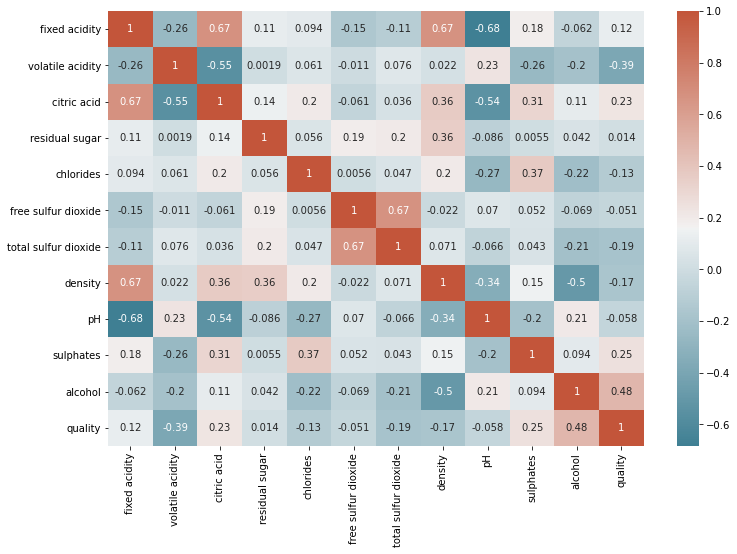

In [18]:
corr = dataset.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

From above plot we can see that some variables are strongly correlated to quality. Probably, these variables may become important features in machine learning model we will create later.

### Distribution of the quality variable

Let us have a look at the distribution of the quality variable we are trying to predict.

In [19]:
print(dataset['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


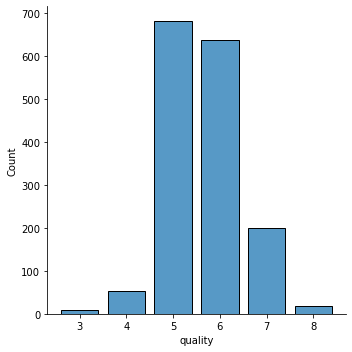

In [20]:
sns.displot(dataset, x="quality", discrete=True, shrink=.8)

From the above results we can understand that quality variable has discrete values ranging from 3 to 8. And number of poor (quality <= 4) quality or excellent(quality >= 7) wines are much lesser than normal wines. This indicates that the dataset is imbalanced.

### Insights after EDA

- There are 1599 rows (observations) and 12 columns (11 + output attribute).
- Data has only float and integer values.
- Data looks very clean and there are no missing values.
- Some variables are strongly correlated to quality.
- Quality variable has discrete values ranging from 3 to 8.
- The dataset is unbalanced. Number of normal wines is much higher than excellent or poor ones.

## ML Modeling

Let us split the dataset into the training and test sets and then apply different regression algorithms to see which algorithm gives better accuracy.

### Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model 1: Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test))

print('Linear Regression RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regression RMSE: 0.673145600891813


### Model 2: Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2)
X_poly = poly_feat.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred = np.round(regressor.predict(poly_feat.transform(X_test)))

print('Polynomial Regression RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))

Polynomial Regression RMSE: 0.6959705453537527


### Model 3: Support Vector Regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1))

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, np.ravel(y_train_sc,order='C'))
y_pred = np.round(sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test))))

print('SVR RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))

SVR RMSE: 0.6754628043053148


### Model 4: Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test))

print('Decision Tree Regressor RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))

Decision Tree Regressor RMSE: 0.7885905147793751


### Model 5: Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,  np.ravel(y_train,order='C'))
y_pred = np.round(regressor.predict(X_test))

print('Random Forest Regressor RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))

Random Forest Regressor RMSE: 0.6349212549600147


### Model Evaluation

From the above results we can see that Random Forest Regression model has the lowest RMSE (.6349) and hence it is the best model.

## Conclusion
Even though we were able to predict the quality of wines with reasonable accuracy, the dataset, anaylysis & modeling techniques we used have some limitations. 

First the data set was unbalanced - Number of normal wines is much higher than excellent or poor ones. These values made it harder to identify different variables influencing “high” or “low” quality of a wine. In order to improve our predictive model, we need more balanced data.

In future, we can try better feature engineering techniques and other machine learning algorithms for getting better results. 